In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing     # For StandardScaler
import sklearn.linear_model      # For LogisticRegression
import sklearn.neural_network    # For MLPClassifier
import torch
import warnings
import os
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)  # Annoying
np.set_printoptions(precision=3, suppress=True)  # Print as 0.001 instead of 9.876e-4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd ..

%cd /content/drive/My Drive/Colorectal Cancer1
import shutil

# Set the source folder and destination folder paths
source_folder = '/content/drive/My Drive/Colorectal Cancer1'
# path to your dataset
destination_folder = '/content/dataset1'

import shutil

# Remove the existing folder if it exists
if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)

# Copy the dataset to the destination folder
shutil.copytree(source_folder, destination_folder)





/content/drive/MyDrive
/content/drive/My Drive/Colorectal Cancer1


'/content/dataset1'

In [ ]:

%cd /content/dataset1


# List files in the destination folder
os.listdir(destination_folder)





/content/dataset1


['NORM', 'MUS', 'STR']

In [ ]:
import os

# lookig for a specific subfolder
destination_folder = '/content/dataset1'


subfolder_name = '/STR/.DS_Store'

# Get a list of all subfolders in the directory
subfolders = [subfolder for subfolder in os.listdir(destination_folder) if os.path.isdir(os.path.join(destination_folder, subfolder))]

if subfolder_name in subfolders:
    print(f"The '{subfolder_name}' subfolder exists in the directory.")
    subfolder_path = os.path.join(destination_folder, subfolder_name)
else:
    print(f"The '{subfolder_name}' subfolder does not exist in the directory.")


The '/STR/.DS_Store' subfolder does not exist in the directory.


# New Section

In [ ]:
# Check the number of .tif files and missing data
expected_count = 6000  # Replace with the expected count

# List all .tif files in the dataset directory
all_tif_files = []
for root, dirs, files in os.walk(destination_folder):
    tif_files = [file for file in files if file.endswith('.tif')]
    all_tif_files.extend(tif_files)

unique_tif_files = list(set(all_tif_files))

# Remove Tiff duplicates in Dataset 1
filtered_tif_files = [file for file in unique_tif_files if "(1)" not in file and "(2)" not in file]


# Calculate the total count of .tif files after removing duplicates
total_count = len(filtered_tif_files)


# Print the results
print(f"Total unique .tif images found: {total_count}")
print(f"Expected count: {expected_count}")
print(f"Missing data: {expected_count - total_count} files are missing.")


Total unique .tif images found: 6000
Expected count: 6000
Missing data: 0 files are missing.


Loaded and transformed images:  6000


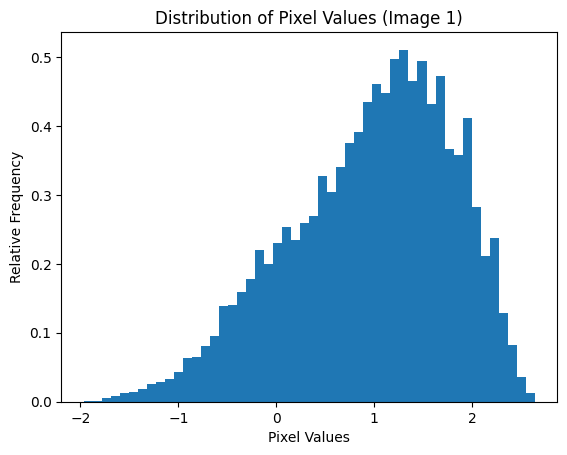

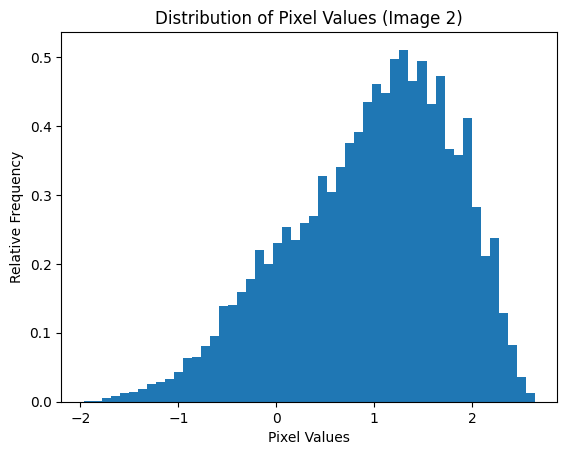

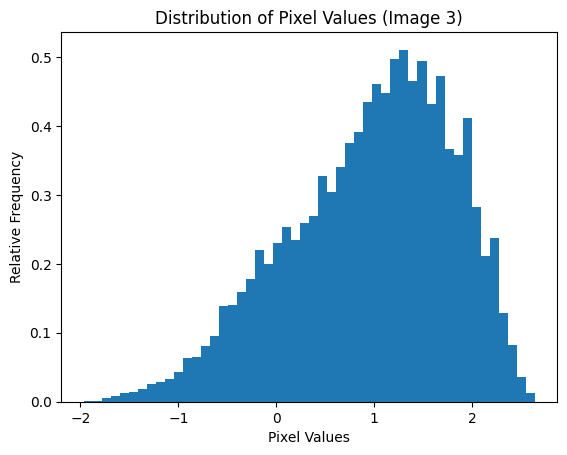

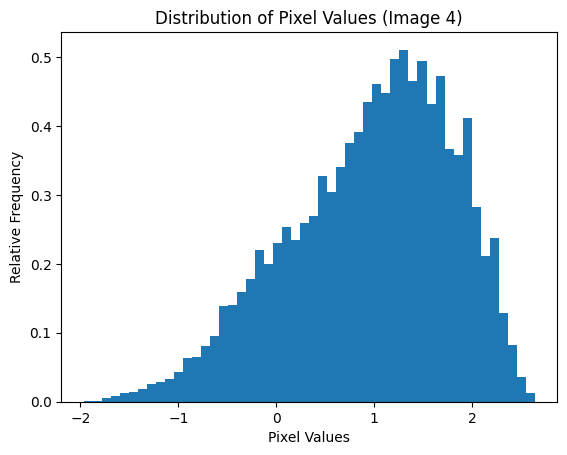

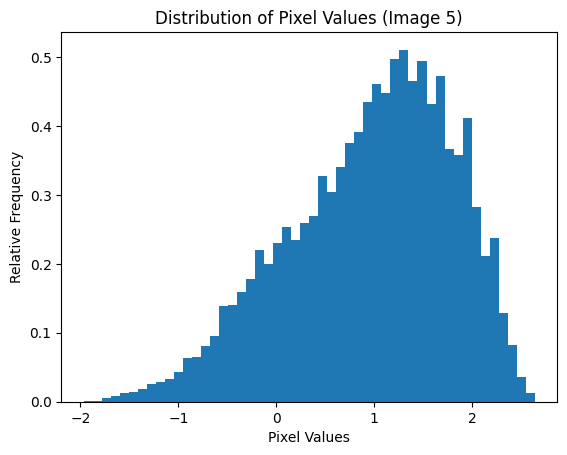

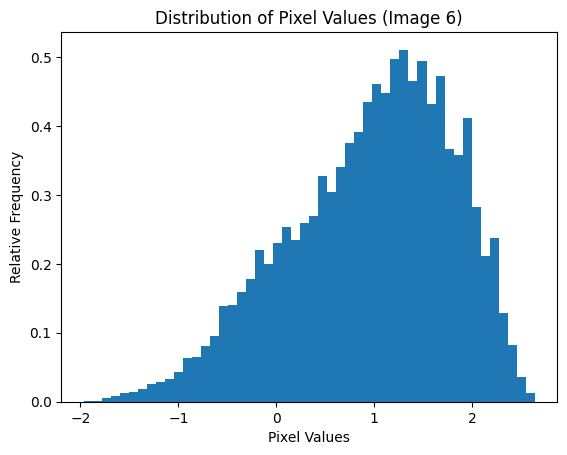

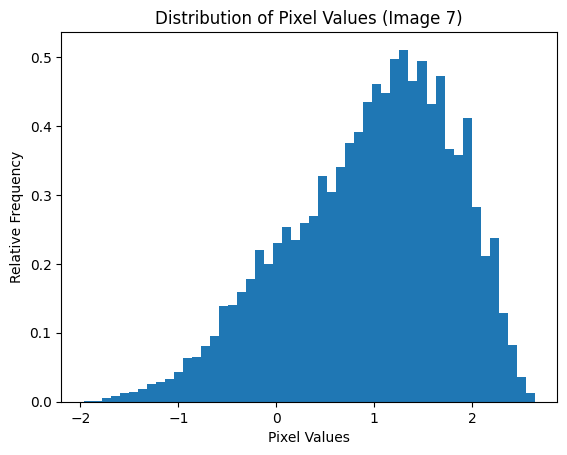

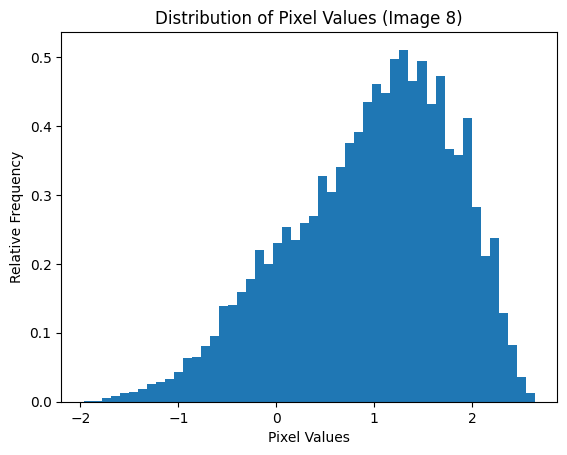

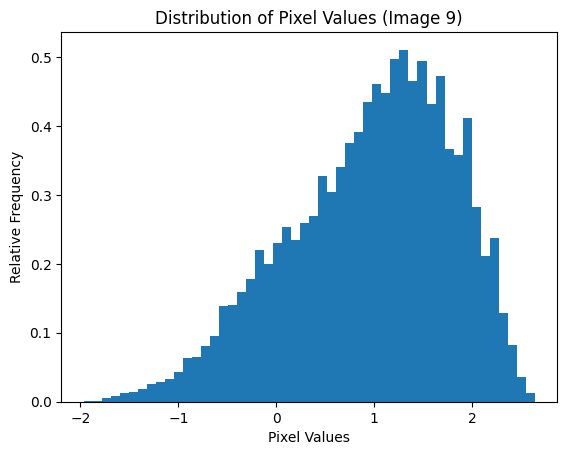

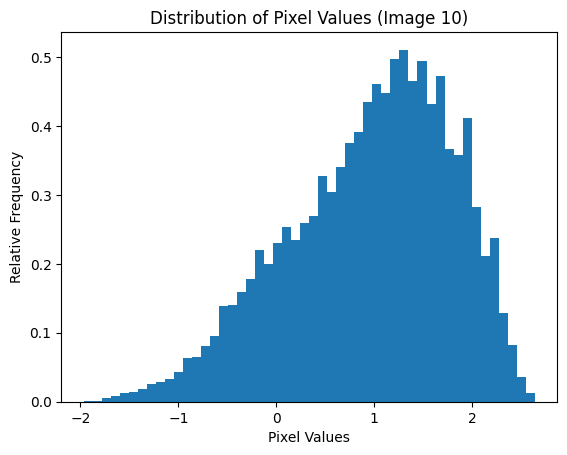

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms

destination_folder = '/content/dataset1'
num_images_to_inspect = 6000

# List all image files in the dataset directory
image_paths = []
for root, dirs, files in os.walk(destination_folder):
    for file in files:
        image_paths.append(os.path.join(root, file))

# Define mean and std values for image normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Initialize a PyTorch transform to load and transform images
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# List to store image tensors
image_tensors = []

# Load and transform images
for i in range(num_images_to_inspect):
    if i < len(image_paths):
        img_path = image_paths[i]
        img = Image.open(img_path)
        img = transform_norm(img)
        image_tensors.append(img)

print("Loaded and transformed images: ", len(image_tensors))

# Plot the pixel values for each image
#Just to verify images are propely normalized and loaded
for i in range(10):
    img_np = img.numpy()
    plt.hist(img_np.ravel(), bins=50, density=True)
    plt.xlabel("Pixel Values")
    plt.ylabel("Relative Frequency")
    plt.title(f"Distribution of Pixel Values (Image {i + 1})")
    plt.show()


NameError: ignored